In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib


In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y = df["Survived"]
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
X = df.drop("Survived", axis=1)


In [4]:
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Sex", "Embarked", "Pclass"]


In [5]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True)
}


In [8]:
results = []

for name, model in models.items():

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


In [9]:
comparison_df = pd.DataFrame(results)
comparison_df


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.810393,0.804469,0.793103,0.666667,0.724409
1,Decision Tree,0.983146,0.804469,0.765625,0.710145,0.736842
2,Random Forest,0.983146,0.810056,0.786885,0.695652,0.738462
3,SVM,0.842697,0.815642,0.821429,0.666667,0.736000


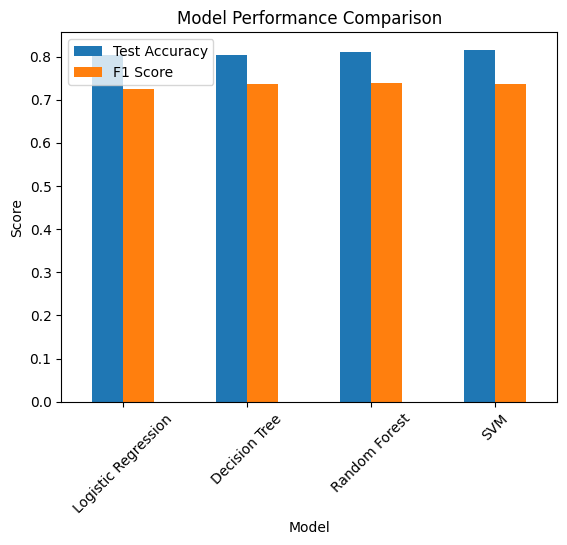

In [10]:
comparison_df.set_index("Model")[["Test Accuracy", "F1 Score"]].plot(kind="bar")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


In [11]:
comparison_df[["Model", "Train Accuracy", "Test Accuracy"]]


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.810393,0.804469
1,Decision Tree,0.983146,0.804469
2,Random Forest,0.983146,0.810056
3,SVM,0.842697,0.815642


In [12]:
best_model_name = comparison_df.sort_values("F1 Score", ascending=False).iloc[0]["Model"]
print("Best Model:", best_model_name)


Best Model: Random Forest


In [13]:
best_model = models[best_model_name]

best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

best_pipeline.fit(X_train, y_train)

joblib.dump(best_pipeline, "best_titanic_model.pkl")


['best_titanic_model.pkl']

In [14]:
from google.colab import files
files.download("best_titanic_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>